# Things to explore:
Formulate hypthesis and test it accordinly.


1. Check correlation between different features. Will it make sense to eliminate the redundant features having strong correlations?e.g. physical health and gen health.

2. what are the top 3 deciding features? How does the model works with just these 3 features vs all 21 features?

3. Try different methods to find out 3 top features.

4. Will creating balanced dataset yield any different results for the model accuracy?

5. What other different models can we implement?

6. Look for existing research in diabetes field and what questions do they answer. Can we think of any alternative ways to test?

#Reference
https://www.cdc.gov/pcd/issues/2019/19_0109.htm


Read this paper and try to think of couple of questions that we need to answer as a part of this project.



# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from google.colab import drive


drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading and cleaning data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Diabetes Project/2015.csv")
df_selected = df[['DIABETE3',
                            '_RFHYPE5',
                           #'TOLDHI2',
                            '_BMI5',
                           #'SMOKE100',
                           #'CVDSTRK3',
                           #'_MICHD',
                           #'_TOTINDA',
                           #'_RFDRHV5',
                           'MENTHLTH',
                           #'PHYSHLTH',
                           #'ADDEPEV2',
                           #'EXERANY2',
                           'GENHLTH',
                           #'SEX',
                           #'_AGEG5YR',
                           #'INCOME2',
                          #  'CHCKIDNY'
                           ]]


#Rename the columns to make them more readable
data = df_selected.rename(columns = {'DIABETE3':'Diabetes',
                                         '_RFHYPE5':'High_BP',
                                        #  'TOLDHI2':'High_Cholestrol',
                                         '_BMI5':'BMI',
                                        #  'SMOKE100':'Smoker',
                                        #  'CVDSTRK3':'Stroke',
                                        #  '_MICHD':'Heart_Disease',
                                         '_TOTINDA':'Physical_Activity',
                                        #  '_RFDRHV5':'Heavy_Alcohol_Consumption',
                                         'MENTHLTH':'Mental_Health',
                                        #  'PHYSHLTH':'Physical_Health',
                                        #  'ADDEPEV2': 'Depression',
                                        #  'EXERANY2': 'Exercise',
                                         'GENHLTH':'General_Health',
                                        #  'SEX':'Sex',
                                        #  '_AGEG5YR':'Age',
                                        #  'INCOME2':'Income',
                                        #  'DECIDE': 'Decision',
                                        #  'CHCKIDNY': 'Kidney_Disease'
                                     })

data.dropna(inplace=True)
data.head()

data['Diabetes'] = data['Diabetes'].replace({2:0, 3:0, 4:0, 1:1})
data = data[data['Diabetes'] != 7]
data = data[data['Diabetes'] != 9]

data['High_BP'] = data['High_BP'].replace({1:0, 2:1})
data = data[data['High_BP'] != 9]

# data['High_Cholestrol'] = data['High_Cholestrol'].replace({2:0})
# data = data[data['High_Cholestrol'] != 7]
# data = data[data['High_Cholestrol'] != 9]

data = data[data['General_Health'] != 7]
data = data[data['General_Health'] != 9]

# data['Smoker'] = data['Smoker'].replace({2:0})
# data = data[data['Smoker'] != 7]
# data = data[data['Smoker'] != 9]

# data['Stroke'] = data['Stroke'].replace({2:0})
# data = data[data['Stroke'] != 7]
# data = data[data['Stroke'] != 9]

# data['Heart_Disease'] = data['Heart_Disease'].replace({2: 0})

# data['Physical_Activity'] = data['Physical_Activity'].replace({2:0})
# data = data[data['Physical_Activity'] != 9]

# data['Heavy_Alcohol_Consumption'] = data['Heavy_Alcohol_Consumption'].replace({1:0, 2:1})
# data = data[data['Heavy_Alcohol_Consumption'] != 9]

data['Mental_Health'] = data['Mental_Health'].replace({88:0})
data = data[data['Mental_Health'] != 77]
data = data[data['Mental_Health'] != 99]

# data['Physical_Health'] = data['Physical_Health'].replace({88:0})
# data = data[data['Physical_Health'] != 77]
# data = data[data['Physical_Health'] != 99]

# data['Sex'] = data['Sex'].replace({2:0})

# data = data[data['Income'] != 77]
# data = data[data['Income'] != 99]

print(data.groupby(['Diabetes']).size())

f1 = []
accuracies = []
precisions = []
recalls = []
roc_aucs = []

print(data.head())

Diabetes
0.0    345166
1.0     51339
dtype: int64
   Diabetes  High_BP     BMI  Mental_Health  General_Health
0       0.0      1.0  4018.0           18.0             5.0
1       0.0      0.0  2509.0            0.0             3.0
2       0.0      0.0  2204.0            0.0             4.0
3       0.0      1.0  2819.0           30.0             5.0
4       0.0      0.0  2437.0            0.0             5.0


# Standardize data

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# standardized_data = scaler.fit_transform(data)

# print(standardized_data)


# data = pd.DataFrame(standardized_data, columns=data.columns)

# print(data)

# Utility Functions

In [ ]:
def print_accu_preci_recall(y_test, y_pred):
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  accuracies.append(metrics.accuracy_score(y_test, y_pred))

  # Model Precision: what percentage of positive tuples are labeled as such?
  print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
  precisions.append(metrics.precision_score(y_test, y_pred, average='weighted'))

  # Model Recall: what percentage of positive tuples are labelled as such?
  print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))
  recalls.append(metrics.recall_score(y_test, y_pred, average='weighted'))

  print("F1-Score:",metrics.f1_score(y_test, y_pred, average='weighted'))
  f1.append(metrics.f1_score(y_test, y_pred, average='weighted'))



def print_confusion_matrix_classification_report(y_test, y_pred):
  print("confusion matrix")
  print(confusion_matrix(y_test, y_pred))
  print('-' * 100)
  print("classification report")
  print(classification_report(y_test, y_pred))


def draw_roc_auc(y_test, y_pred, model_name):
  roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
  roc_aucs.append(roc_auc)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.figure()
  plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig(f'{model_name}_ROC')
  plt.show()

# Creating balanced dataset

In [ ]:
data_1 = data[data['Diabetes'] == 1]
data_0 = data[data['Diabetes'] == 0]

data_0 = data_0.take(np.random.permutation(len(data_0))[:51339])
balanced_data = data_0.append(data_1, ignore_index = True)

balanced_data.groupby(['Diabetes']).size()

Diabetes
0.0    51339
1.0    51339
dtype: int64

# Splitting data into train and test data

In [ ]:
X = data.iloc[:,1:19]  #independent columns
y = data['Diabetes']    #target column i.e price range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Splitting balanced data into train and test data

In [ ]:
X_balanced = balanced_data.iloc[:,1:19]  #independent columns
y_balanced = balanced_data['Diabetes']    #target column i.e price range
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Correlation

In [ ]:
# corrmat = data.corr()
# top_corr_features = corrmat.index

# plt.figure(figsize=(21,21))
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# corrmat

From correlation it is clear that probability of diabetes increases with increase in high bp, high bmi, low general health

# Try Univariate Selection

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2


# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

# data.shape

# Try with decision tree feature importance

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier


# model = ExtraTreesClassifier()
# model.fit(X,y)

# print(model.feature_importances_)

# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

# Decision tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# With skewed data

# Create Decision Tree classifer object
deci_tree_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
deci_tree_clf = deci_tree_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_deci_tree_pred = deci_tree_clf.predict(X_test)


# # With balanced data

# # Create Decision Tree classifer object
# deci_tree_clf = DecisionTreeClassifier()

# # Train Decision Tree Classifer
# deci_tree_clf = deci_tree_clf.fit(X_balanced_train, y_balanced_train)

# #Predict the response for test dataset
# y_balanced_deci_tree_pred = deci_tree_clf.predict(X_balanced_test)



# Decision tree Stats

Accuracy: 0.8579426995762996
Precision: 0.8164826764854412
Recall: 0.8579426995762996
F1-Score: 0.8294218065930323
----------------------------------------------------------------------------------------------------
confusion matrix
[[99957  3758]
 [13140  2097]]
----------------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92    103715
         1.0       0.36      0.14      0.20     15237

    accuracy                           0.86    118952
   macro avg       0.62      0.55      0.56    118952
weighted avg       0.82      0.86      0.83    118952

----------------------------------------------------------------------------------------------------


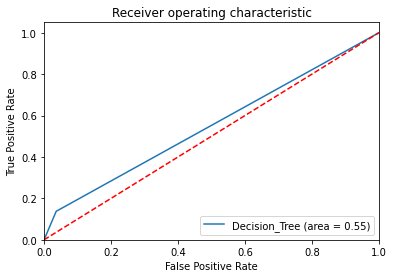

----------------------------------------------------------------------------------------------------


In [ ]:
# With Skewed Data
print_accu_preci_recall(y_test, y_deci_tree_pred)
print('-' * 100)
print_confusion_matrix_classification_report(y_test, y_deci_tree_pred)
print('-' * 100)
draw_roc_auc(y_test, y_deci_tree_pred, model_name="Decision_Tree")
print('-' * 100)

# # With balanced Data
# print_accu_preci_recall(y_balanced_test, y_balanced_deci_tree_pred)
# print('-' * 100)
# print_confusion_matrix_classification_report(y_balanced_test, y_balanced_deci_tree_pred)
# print('-' * 100)
# draw_roc_auc(y_balanced_test, y_balanced_deci_tree_pred, model_name="Decision_Tree")
# print('-' * 100)



# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)
y_gaus_pred = gaus_clf.predict(X_test)


# With balanced data
# gaus_clf = DecisionTreeClassifier()
# gaus_clf = gaus_clf.fit(X_balanced_train, y_balanced_train)
# y_balanced_gaus_pred = gaus_clf.predict(X_balanced_test)


# Gaussian Naive Bayes stats

Accuracy: 0.8452400968457865
Precision: 0.8285984664167112
Recall: 0.8452400968457865
F1-Score: 0.8358939443314521
----------------------------------------------------------------------------------------------------
confusion matrix
[[96362  7353]
 [11056  4181]]
----------------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91    103715
         1.0       0.36      0.27      0.31     15237

    accuracy                           0.85    118952
   macro avg       0.63      0.60      0.61    118952
weighted avg       0.83      0.85      0.84    118952

----------------------------------------------------------------------------------------------------


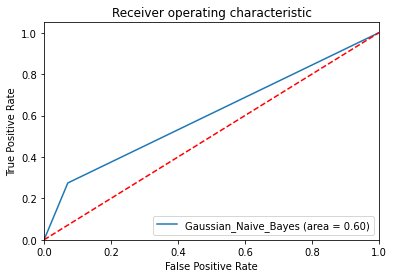

----------------------------------------------------------------------------------------------------


In [ ]:
# With Skewed Data
print_accu_preci_recall(y_test, y_gaus_pred)
print('-' * 100)
print_confusion_matrix_classification_report(y_test, y_gaus_pred)
print('-' * 100)
draw_roc_auc(y_test, y_gaus_pred, model_name="Gaussian_Naive_Bayes")
print('-' * 100)

# # With balanced Data
# print_accu_preci_recall(y_balanced_test, y_balanced_gaus_pred)
# print('-' * 100)
# print_confusion_matrix_classification_report(y_balanced_test, y_balanced_gaus_pred)
# print('-' * 100)
# draw_roc_auc(y_balanced_test, y_balanced_gaus_pred, model_name="Gaussian_Naive_Bayes")
# print('-' * 100)



# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
y_logreg_pred = logreg_clf.predict(X_test)


# # With balanced data
# logreg_clf = DecisionTreeClassifier()
# logreg_clf = logreg_clf.fit(X_balanced_train, y_balanced_train)
# y_balanced_logreg_pred = logreg_clf.predict(X_balanced_test)

# Logistic regression stats

Accuracy: 0.8721585177214338
Precision: 0.8324266076828216
Recall: 0.8721585177214338
F1-Score: 0.8306832347222343
----------------------------------------------------------------------------------------------------
confusion matrix
[[102418   1297]
 [ 13910   1327]]
----------------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    103715
         1.0       0.51      0.09      0.15     15237

    accuracy                           0.87    118952
   macro avg       0.69      0.54      0.54    118952
weighted avg       0.83      0.87      0.83    118952

----------------------------------------------------------------------------------------------------


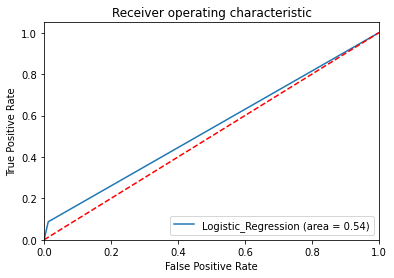

----------------------------------------------------------------------------------------------------


In [ ]:
# With Skewed Data
print_accu_preci_recall(y_test, y_logreg_pred)
print('-' * 100)
print_confusion_matrix_classification_report(y_test, y_logreg_pred)
print('-' * 100)
draw_roc_auc(y_test, y_logreg_pred, model_name="Logistic_Regression")
print('-' * 100)

# # With balanced Data
# print_accu_preci_recall(y_balanced_test, y_balanced_logreg_pred)
# print('-' * 100)
# print_confusion_matrix_classification_report(y_balanced_test, y_balanced_logreg_pred)
# print('-' * 100)
# draw_roc_auc(y_balanced_test, y_balanced_logreg_pred, model_name="Logistic_Regression")
# print('-' * 100)



# ANN Model

In [ ]:
import tensorflow as tf

# With Skewed data
#Initialising ANN
ann = tf.keras.models.Sequential()
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#  #Adding Third Hidden Layer
# ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
# #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
# Fitting ANN
ann.fit(X_train,y_train,batch_size=256, epochs = 100, validation_split=0.2)
#Predicting result for Single Observation
# y_ann_pred_bool =  ann.predict(X_test) > 0.5


# # With balanced data

# #Initialising ANN
# ann_balanced = tf.keras.models.Sequential()
#  #Adding First Hidden Layer
# ann_balanced.add(tf.keras.layers.Dense(units=6,activation="relu"))
#  #Adding Second Hidden Layer
# ann_balanced.add(tf.keras.layers.Dense(units=6,activation="relu"))
# #Adding Output Layer
# ann_balanced.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
# #Compiling ANN
# ann_balanced.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
# # Fitting ANN
# ann_balanced.fit(X_balanced_train,y_balanced_train,batch_size=256,epochs = 100, validation_split=0.2)
# #Predicting result for Single Observation
# y_balanced_pred_bool =  model.predict(X_balanced_test) > 0.5



Epoch 1/100
868/868 [==============================] - 3s 3ms/step - loss: 49.4529 - accuracy: 0.7619 - val_loss: 0.4166 - val_accuracy: 0.8696
Epoch 2/100
868/868 [==============================] - 2s 2ms/step - loss: 0.4161 - accuracy: 0.8700 - val_loss: 0.4094 - val_accuracy: 0.8696
Epoch 3/100
868/868 [==============================] - 2s 2ms/step - loss: 0.4112 - accuracy: 0.8700 - val_loss: 0.3993 - val_accuracy: 0.8696
Epoch 4/100
868/868 [==============================] - 2s 2ms/step - loss: 0.4053 - accuracy: 0.8700 - val_loss: 0.4070 - val_accuracy: 0.8696
Epoch 5/100
868/868 [==============================] - 2s 2ms/step - loss: 0.3978 - accuracy: 0.8697 - val_loss: 0.4316 - val_accuracy: 0.8696
Epoch 6/100
868/868 [==============================] - 2s 2ms/step - loss: 0.3946 - accuracy: 0.8691 - val_loss: 0.3748 - val_accuracy: 0.8696
Epoch 7/100
868/868 [==============================] - 2s 2ms/step - loss: 0.3887 - accuracy: 0.8681 - val_loss: 0.3768 - val_accuracy: 0.867

# ANN Stats

3718/3718 [==============================] - 5s 1ms/step
Accuracy: 0.8665091801735154
Precision: 0.8355040307042982
Recall: 0.8665091801735154
F1-Score: 0.8436805527445449
----------------------------------------------------------------------------------------------------
confusion matrix
[[99979  3736]
 [12143  3094]]
----------------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93    103715
         1.0       0.45      0.20      0.28     15237

    accuracy                           0.87    118952
   macro avg       0.67      0.58      0.60    118952
weighted avg       0.84      0.87      0.84    118952

----------------------------------------------------------------------------------------------------


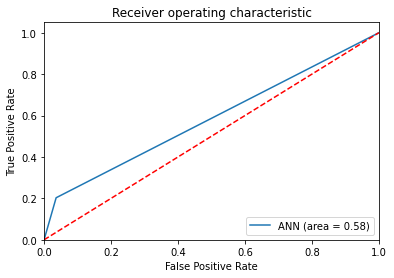

----------------------------------------------------------------------------------------------------


In [ ]:
y_ann_pred_bool =  ann.predict(X_test) > 0.5
# With Skewed Data
print_accu_preci_recall(y_test, y_ann_pred_bool)
print('-' * 100)
print_confusion_matrix_classification_report(y_test, y_ann_pred_bool)
print('-' * 100)
draw_roc_auc(y_test, y_ann_pred_bool, model_name="ANN")
print('-' * 100)

# # With balanced Data
# print_accu_preci_recall(y_balanced_test, y_balanced_pred_bool)
# print('-' * 100)
# print_confusion_matrix_classification_report(y_balanced_test, y_balanced_pred_bool)
# print('-' * 100)
# draw_roc_auc(y_balanced_test, y_balanced_pred_bool, model_name="ANN")
# print('-' * 100)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor(n_neighbors=9)

knn_model.fit(X_train, y_train)

# Calculate the accuracy of the model


# print(np.nonzero_count(test_preds))

print(knn_model.score(X_test, y_test))

In [ ]:
test_preds = knn_model.predict(X_test) > 0.5

# With Skewed Data
print_accu_preci_recall(y_test, test_preds)
print('-' * 100)
print_confusion_matrix_classification_report(y_test, test_preds)
print('-' * 100)
draw_roc_auc(y_test, test_preds, model_name="KNN")
print('-' * 100)

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

# model = ExtraTreesClassifier()
# model.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)




# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

# Random Forest

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# With Skewed data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=5)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test) > 0.5


# # With balanced data
# rf_balanced = RandomForestRegressor()#n_estimators = 1000, random_state = 42, max_depth=5)
# rf_balanced.fit(X_balanced_train, y_balanced_train)
# y_rf_balanced_pred = rf_balanced.predict(X_balanced_test)

Accuracy: 0.8733354630439168
Precision: 0.8362822878912151
Recall: 0.8733354630439168
F1-Score: 0.825341698515847
----------------------------------------------------------------------------------------------------
confusion matrix
[[103046    669]
 [ 14398    839]]
----------------------------------------------------------------------------------------------------
classification report
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    103715
         1.0       0.56      0.06      0.10     15237

    accuracy                           0.87    118952
   macro avg       0.72      0.52      0.52    118952
weighted avg       0.84      0.87      0.83    118952

----------------------------------------------------------------------------------------------------


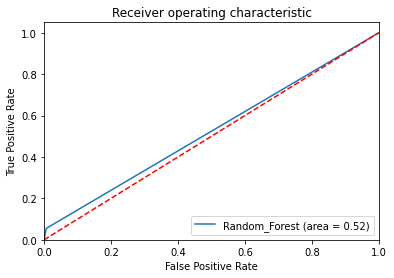

----------------------------------------------------------------------------------------------------


In [ ]:
# With Skewed Data
print_accu_preci_recall(y_test, y_rf_pred)
print('-' * 100)
print_confusion_matrix_classification_report(y_test, y_rf_pred)
print('-' * 100)
draw_roc_auc(y_test, y_rf_pred, model_name="Random_Forest")
print('-' * 100)


# # With balanced Data
# print_accu_preci_recall(y_balanced_test, y_rf_balanced_pred)
# print('-' * 100)
# print_confusion_matrix_classification_report(y_balanced_test, y_rf_balanced_pred)
# print('-' * 100)
# draw_roc_auc(y_balanced_test, y_rf_balanced_pred, model_name="ANN")
# print('-' * 100)

In [ ]:
print(accuracies)
print(precisions)
print(f1)
print(recalls)
print(roc_aucs)

[0.8579426995762996, 0.8452400968457865, 0.8721585177214338, 0.8665091801735154, 0.8647857959513081, 0.8733354630439168]
[0.8164826764854412, 0.8285984664167112, 0.8324266076828216, 0.8355040307042982, 0.8185306477572969, 0.8362822878912151]
[0.8294218065930323, 0.8358939443314521, 0.8306832347222343, 0.8436805527445449, 0.8285622453282504, 0.825341698515847]
[0.8579426995762996, 0.8452400968457865, 0.8721585177214338, 0.8665091801735154, 0.8647857959513081, 0.8733354630439168]
[0.5506958032996222, 0.6017508206981416, 0.5372926055614989, 0.5835182771674986, 0.5395032829270339, 0.5243064819389616]


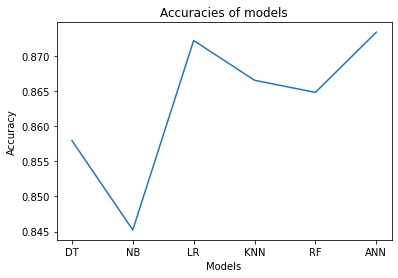

In [ ]:
x_axis = ['DT', 'NB', 'LR', 'KNN', 'RF', 'ANN']
y_axis = accuracies

plt.plot(x_axis, y_axis)
plt.title('Accuracies of models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

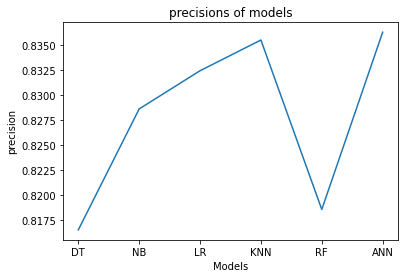

In [ ]:
x_axis = ['DT', 'NB', 'LR', 'KNN', 'RF', 'ANN']
y_axis = precisions

plt.plot(x_axis, y_axis)
plt.title('precisions of models')
plt.xlabel('Models')
plt.ylabel('precision')
plt.show()

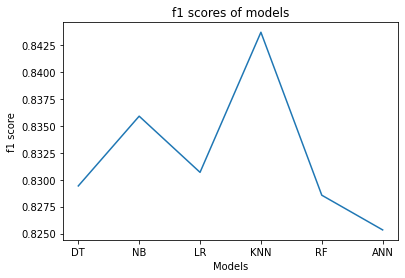

In [ ]:
x_axis = ['DT', 'NB', 'LR', 'KNN', 'RF', 'ANN']
y_axis = f1

plt.plot(x_axis, y_axis)
plt.title('f1 scores of models')
plt.xlabel('Models')
plt.ylabel('f1 score')
plt.show()

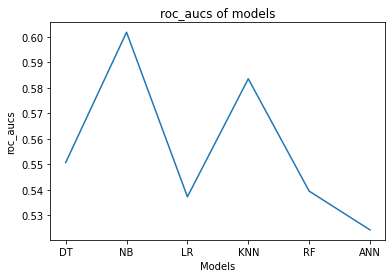

In [ ]:
x_axis = ['DT', 'NB', 'LR', 'KNN', 'RF', 'ANN']
y_axis = roc_aucs

plt.plot(x_axis, y_axis)
plt.title('roc_aucs of models')
plt.xlabel('Models')
plt.ylabel('roc_aucs')
plt.show()

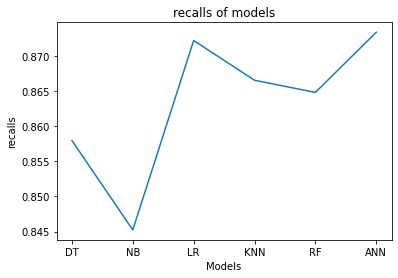

In [ ]:
x_axis = ['DT', 'NB', 'LR', 'KNN', 'RF', 'ANN']
y_axis = recalls

plt.plot(x_axis, y_axis)
plt.title('recalls of models')
plt.xlabel('Models')
plt.ylabel('recalls')
plt.show()

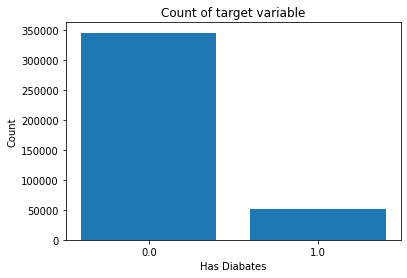

In [ ]:
x_axis = ['0.0', '1.0']
y_axis = [345166, 51339]

plt.bar(x_axis, y_axis)
plt.title('Count of target variable')
plt.xlabel('Has Diabates')
plt.ylabel('Count')
plt.show()


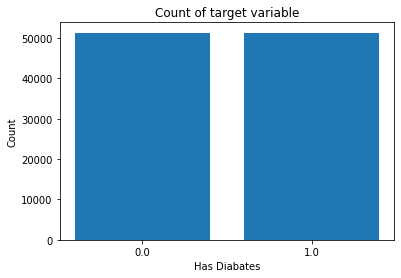

In [ ]:
x_axis = ['0.0', '1.0']
y_axis = [51339, 51339]

plt.bar(x_axis, y_axis)
plt.title('Count of target variable')
plt.xlabel('Has Diabates')
plt.ylabel('Count')
plt.show()

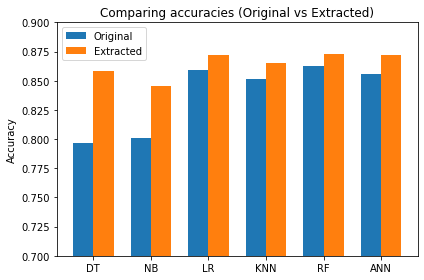

In [ ]:
labels = ['DT', 'NB', 'LR', 'KNN', 'RF', 'ANN']

Original = [0.7967277341776831,
0.8006948636761245,
0.8594379489201276,
0.851565291312972,
0.8628137050771866,
0.85570490470265]

Extracted = [ 0.8579595130809066,
0.8452400968457865,
0.8721585177214338,
0.8647857959513081,
0.8733354630439168,
0.8719063151523303,
]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Original, width, label='Original')
rects2 = ax.bar(x + width/2, Extracted, width, label='Extracted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Comparing accuracies (Original vs Extracted)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_ylim([0.7, 0.9])

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


# SVM for prediction

In [ ]:
# # Import train_test_split function
# from sklearn.model_selection import train_test_split

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)



# #Import svm model
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)






# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))